<a href="https://colab.research.google.com/github/GRT27/UnsuperWise/blob/main/Sheet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Credit Card Transaction Data Europe September 2013
# Building Fraud Detection on Unseen Data
# Class : Fraudlent or Genuine

# Dataset = 284,807 Transactions
# 492 are fraudlent
# 28 Numerical features
# 3 seperate Class time of transaction , amount of transaction , true class of transactuib


import requests

# URL of the CSV file
url = "https://github.com/aapatel09/handson-unsupervised-learning/tree/b4161879f2b21b6f4c6ef5ab27154f2a6d6acf77/datasets/credit_card_data"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the content of the response (CSV data) to a file
    with open("credit_card.csv", "wb") as f:
        f.write(response.content)
    print("CSV file downloaded successfully.")
else:
    print("Failed to download the CSV file.")


CSV file downloaded successfully.


In [ ]:
# Import the libraries

''' Main '''

import numpy as np
import pandas as pd
import os

''' Data Visualisation '''

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

''' Data Prep '''

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve , average_precision_score
from sklearn.metrics import roc_curve , auc , roc_auc_score
from sklearn.metrics import confusion_matrix , classification_report

''' Algos '''


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb



In [ ]:
# Reading the current Data

data = pd.read_csv('/content/creditcard.csv')
data.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,15936.000000,...,15936.000000,15936.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000,15935.000000
mean,12121.217871,-0.254293,0.277171,0.803852,0.301343,-0.130469,0.112551,-0.150434,0.000687,0.860838,...,-0.061754,-0.162257,-0.036524,0.011509,0.117477,0.037900,0.015402,0.006161,66.390222,0.004581
std,8982.283843,1.843083,1.491497,1.704252,1.491713,1.382485,1.329406,1.321898,1.303509,1.253988,...,0.855525,0.624614,0.543296,0.587200,0.436867,0.546881,0.401168,0.253739,189.355098,0.067531
min,0.000000,-28.344757,-40.978852,-27.368650,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.512377,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3633.500000,-0.970824,-0.286548,0.371671,-0.621215,-0.712525,-0.639011,-0.600811,-0.179179,0.067089,...,-0.268829,-0.559341,-0.173003,-0.336475,-0.140144,-0.355523,-0.073563,-0.013205,5.490000,0.000000
50%,10980.000000,-0.318478,0.247437,0.941822,0.231366,-0.186241,-0.160812,-0.084696,0.017471,0.851878,...,-0.127164,-0.126343,-0.044512,0.060331,0.155636,-0.027574,0.001209,0.017630,15.950000,0.000000
75%,20621.500000,1.161949,0.884689,1.575960,1.180124,0.352221,0.501828,0.440006,0.266216,1.567643,...,0.027233,0.229727,0.072765,0.393416,0.393032,0.359173,0.100782,0.076575,53.890000,0.000000
max,27371.000000,1.960497,14.601998,4.101716,11.927512,34.099309,21.393069,34.303177,17.052566,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [ ]:
data.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
data['Class'].sum()

73.0

 The	total	number	of	positive	labels,	or	fraudulent	transactions,	is	492.	There	are
 284,807	instances	and	31	columns	as	expected—28	numerical	features	(V1
 through	V28),	Time,	Amount,	and	Class.
 The	timestamps	range	from	0	to	172,792,	the	amounts	range	from	0	to
 25,691.16,	and	there	are	492	fraudulent	transactions.	These	fraudulent
 transactions	are	also	referred	to	as	positive	cases	or	positive	labels	(labeled	as
 one);	the	normal	transactions	are	negative	cases	or	negative	labels	(labeled	as
 zero).

In [ ]:
# Identifying The nonumerical Values by feature
nanCounter = np.isnan(data).sum()
print(nanCounter)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
# Identifying distinct Value by feature

distinctCounter = data.apply(lambda x : len(x.unique()))
distinctCounter

Time      10850
V1        15443
V2        15443
V3        15443
V4        15443
V5        15443
V6        15443
V7        15443
V8        15443
V9        15443
V10       15443
V11       15443
V12       15443
V13       15443
V14       15443
V15       15443
V16       15443
V17       15443
V18       15443
V19       15443
V20       15443
V21       15443
V22       15443
V23       15443
V24       15443
V25       15443
V26       15443
V27       15443
V28       15443
Amount     5211
Class         3
dtype: int64

In [ ]:
# Generating Feature Matrix and Labels Array

# creating feature matrix x and labels array y
dataX = data.copy().drop(['Class'], axis=1)
dataY = data['Class'].copy()  # Corrected assignment

# Standardizing the feature matrix X
featuresToScale = dataX.drop(['Time'], axis=1).columns
sX = pp.StandardScaler(copy=True)
dataX.loc[:, featuresToScale] = sX.fit_transform(dataX[featuresToScale])

print(dataX.describe())
print(dataY.describe())

               Time            V1            V2            V3            V4  \
count  15936.000000  1.593600e+04  1.593600e+04  1.593600e+04  1.593600e+04   
mean   12121.217871  9.809199e-18  3.031934e-17  2.853585e-17  1.783491e-17   
std     8982.283843  1.000031e+00  1.000031e+00  1.000031e+00  1.000031e+00   
min        0.000000 -1.524150e+01 -2.766168e+01 -1.653123e+01 -3.669681e+00   
25%     3633.500000 -3.887797e-01 -3.779672e-01 -2.535975e-01 -6.184750e-01   
50%    10980.000000 -3.482602e-02 -1.993634e-02  8.095892e-02 -4.691193e-02   
75%    20621.500000  7.684331e-01  4.073332e-01  4.530626e-01  5.891268e-01   
max    27371.000000  1.201714e+00  9.604628e+00  1.935141e+00  7.794083e+00   

                 V5            V6            V7            V8            V9  \
count  15936.000000  1.593600e+04  1.593600e+04  1.593600e+04  15936.000000   
mean       0.000000 -3.566982e-18 -7.133963e-18 -7.133963e-18      0.000000   
std        1.000031  1.000031e+00  1.000031e+00  1.

In [ ]:
# Checking Correlation of Features in Dataset

correlationMatrix = pd.DataFrame(data=[],index=dataX.columns,
 columns=dataX.columns)

# Replace infinite values with NaN
dataX.replace([np.inf, -np.inf], np.nan, inplace=True)

# Drop rows containing NaN values
dataX.dropna(inplace=True)

# Checking Correlation of Features in Dataset
correlationMatrix = pd.DataFrame(data=[], index=dataX.columns, columns=dataX.columns)

for i in dataX.columns:
    for j in dataX.columns:
        correlationMatrix.loc[i, j] = np.round(pearsonr(dataX.loc[:, i], dataX.loc[:, j])[0], 2)

print(correlationMatrix)

        Time    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...   V20  \
Time     1.0 -0.01 -0.01 -0.07  0.06 -0.08 -0.03 -0.09  0.06  0.12  ...  -0.0   
V1     -0.01   1.0 -0.27  0.34 -0.11  0.11  0.13  0.29  -0.1  0.03  ... -0.14   
V2     -0.01 -0.27   1.0 -0.37  0.14 -0.26 -0.03 -0.11  0.06 -0.13  ...  0.01   
V3     -0.07  0.34 -0.37   1.0  -0.2  0.34  0.05  0.51 -0.32  0.24  ... -0.14   
V4      0.06 -0.11  0.14  -0.2   1.0 -0.15 -0.05 -0.22  0.12 -0.21  ...  0.01   
V5     -0.08  0.11 -0.26  0.34 -0.15   1.0  0.17   0.2 -0.17  0.03  ... -0.04   
V6     -0.03  0.13 -0.03  0.05 -0.05  0.17   1.0  0.09 -0.08  0.04  ... -0.02   
V7     -0.09  0.29 -0.11  0.51 -0.22   0.2  0.09   1.0 -0.16  0.08  ...  0.01   
V8      0.06  -0.1  0.06 -0.32  0.12 -0.17 -0.08 -0.16   1.0 -0.12  ...  0.11   
V9      0.12  0.03 -0.13  0.24 -0.21  0.03  0.04  0.08 -0.12   1.0  ...  0.02   
V10    -0.07  0.03 -0.03  0.31 -0.08  0.24  0.11  0.34 -0.23  0.11  ...  0.08   
V11     0.12 -0.09  0.14 -0.

In [ ]:
# Check the shape of dataX and dataY
print("Shape of dataX:", dataX.shape)
print("Shape of dataY:", dataY.shape)

# Drop rows in dataY where there are NaN values
dataY.dropna(inplace=True)

# Check the shape of dataX and dataY after dropping NaN values
print("Shape of dataX after dropping NaNs:", dataX.shape)
print("Shape of dataY after dropping NaNs:", dataY.shape)

Shape of dataX: (15935, 30)
Shape of dataY: (15936,)
Shape of dataX after dropping NaNs: (15935, 30)
Shape of dataY after dropping NaNs: (15935,)


Text(0, 0.5, 'Frequence Percentage')

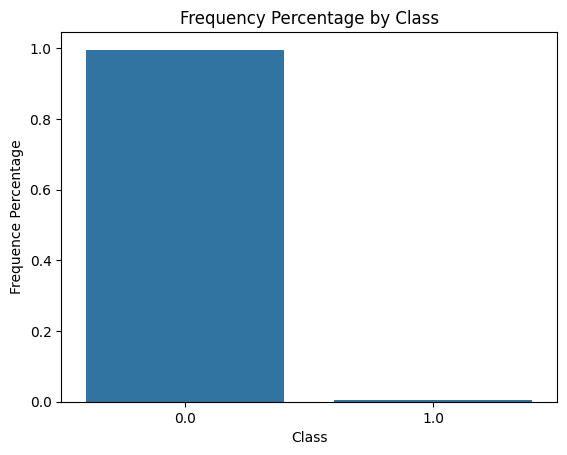

In [ ]:
# Data Visulisation

count_classes = pd.value_counts(data['Class'],sort=True).sort_index()
ax = sns.barplot(x=count_classes.index ,y=tuple(count_classes/len(data)))
ax.set_title('Frequency Percentage by Class')
ax.set_xlabel('Class')
ax.set_ylabel('Frequence Percentage')


In [ ]:

# Model preparation

X_train, X_test, y_train, y_test = train_test_split(dataX,
                                    dataY, test_size=0.33,
                                    random_state=2018, stratify=dataY)

# Selecting Cost Function as Binary Classification Log Loss
# Creating K Fold Cross Validation Sets

k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2018)

In [ ]:
# Remove NaN values from y_train
nan_indices = y_train[pd.isnull(y_train)].index
X_train = X_train.drop(nan_indices)
y_train = y_train.drop(nan_indices)

# Check the shape of dataX and dataY after dropping NaN values
print("Shape of X_train after dropping NaNs:", X_train.shape)
print("Shape of y_train after dropping NaNs:", y_train.shape)


Shape of X_train after dropping NaNs: (10676, 30)
Shape of y_train after dropping NaNs: (10676,)


In [ ]:
# Model #1 Logistic Regression

# Setting Hyperparameters
penalty = 'l2'
C = 1.0
class_weight = 'balanced'
random_state = 2018
solver = 'liblinear'
n_jobs = -1  # Define the number of CPU cores to use

logReg = LogisticRegression(penalty=penalty, C=C, class_weight=class_weight,
                            random_state=random_state, solver=solver, n_jobs=n_jobs)

trainingScores = []
cVScores = []

predictionsBasedonKFolds = pd.DataFrame(index=X_test.index, columns=[0, 1])  # Initialize DataFrame

model = logReg
for train_index, cv_index in k_fold.split(np.zeros(len(X_train)), y_train.ravel()):
    X_train_fold, X_cv_fold = X_train.iloc[train_index, :], X_train.iloc[cv_index, :]
    y_train_fold, y_cv_fold = y_train.iloc[train_index], y_train.iloc[cv_index]

    model.fit(X_train_fold, y_train_fold)
    loglossTraining = log_loss(y_train_fold, model.predict_proba(X_train_fold)[:, 1])
    trainingScores.append(loglossTraining)

    # Predict probabilities for the current fold
    fold_predictions = pd.DataFrame(model.predict_proba(X_cv_fold), index=X_cv_fold.index, columns=[0, 1])

    # Merge predictions with predictionsBasedonKFolds
    predictionsBasedonKFolds = pd.concat([predictionsBasedonKFolds, fold_predictions])

    loglossCV = log_loss(y_cv_fold, fold_predictions.loc[:, 1])
    cVScores.append(loglossCV)

    print("Training Scores:", trainingScores)
    print("CV Scores:", cVScores)



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Training Scores: [0.03725239417848446]
CV Scores: [0.07220132414652873]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Training Scores: [0.03725239417848446, 0.05886018844517685]
CV Scores: [0.07220132414652873, 0.061031791766564245]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Training Scores: [0.03725239417848446, 0.05886018844517685, 0.05235644607951758]
CV Scores: [0.07220132414652873, 0.061031791766564245, 0.05614498680887293]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Training Scores: [0.03725239417848446, 0.05886018844517685, 0.05235644607951758, 0.038673890451189075]
CV Scores: [0.07220132414652873, 0.061031791766564245, 0.05614498680887293, 0.029711377548400298]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1211: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  warnings.warn(


Training Scores: [0.03725239417848446, 0.05886018844517685, 0.05235644607951758, 0.038673890451189075, 0.037722968011036445]
CV Scores: [0.07220132414652873, 0.061031791766564245, 0.05614498680887293, 0.029711377548400298, 0.05901911541065151]


In [ ]:
# Remove NaN values from y_train
nan_indices = y_test[pd.isnull(y_test)].index
X_test = X_test.drop(nan_indices)
y_test = y_test.drop(nan_indices)

# Check the shape of dataX and dataY after dropping NaN values
print("Shape of X_train after dropping NaNs:", X_test.shape)
print("Shape of y_train after dropping NaNs:", y_test.shape)


Shape of X_train after dropping NaNs: (5259, 30)
Shape of y_train after dropping NaNs: (5259,)


In [ ]:
# Reset index of predictionsBasedonKFolds
predictionsBasedonKFolds.reset_index(drop=True, inplace=True)

# Align indices of X_test and predictionsBasedonKFolds
indices_to_keep = X_test.index.intersection(predictionsBasedonKFolds.index)
X_test_aligned = X_test.loc[indices_to_keep]
predictionsBasedonKFolds_aligned = predictionsBasedonKFolds.loc[indices_to_keep]

# Calculate overall log loss for logistic regression
loglossLogisticRegression = log_loss(y_test.loc[indices_to_keep], predictionsBasedonKFolds_aligned.loc[:, 1])
print("Log Loss Logistic Regression:", loglossLogisticRegression)


Log Loss Logistic Regression: 0.15112210458103092
